In [1]:
! pip install -q kaggle

You should consider upgrading via the '/opt/conda/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/home/.kaggle’: File exists


In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          17989       1397  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10705        758  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5344        349  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [5]:
! kaggle competitions download -c noaa-right-whale-recognition

100%|█████████████████████████████████████▉| 9.11G/9.12G [08:46<00:00, 21.0MB/s]
100%|██████████████████████████████████████| 9.12G/9.12G [08:46<00:00, 18.6MB/s]


In [6]:
! unzip noaa-right-whale-recognition.zip

Archive:  noaa-right-whale-recognition.zip
  inflating: imgs.zip                
  inflating: imgs_subset.zip         
  inflating: sample_submission.csv   
  inflating: sample_submission.csv.zip  
  inflating: train.csv               
  inflating: train.csv.zip           
  inflating: w_7489.jpg              
  inflating: w_7489.jpg.zip          


In [47]:
%%time
import fastai
from fastai.vision.all import *
from fastai.tabular.all import *
import os
from pathlib import Path
import shutil

CPU times: user 504 µs, sys: 108 µs, total: 612 µs
Wall time: 619 µs


In [12]:
%%time
im = Image.open("w_7489.jpg")
im.thumbnail((200,200))

CPU times: user 40.9 ms, sys: 3.96 ms, total: 44.9 ms
Wall time: 42.7 ms


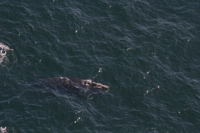

CPU times: user 35.5 ms, sys: 345 µs, total: 35.9 ms
Wall time: 33.1 ms


In [13]:
%%time
im.show()

In [14]:
%%time
train = pd.read_csv("train.csv")

CPU times: user 5.89 ms, sys: 8.79 ms, total: 14.7 ms
Wall time: 13.1 ms


In [15]:
%%time
train.head()

CPU times: user 334 µs, sys: 68 µs, total: 402 µs
Wall time: 411 µs


,Image,whaleID
0,w_7812.jpg,whale_48813
1,w_4598.jpg,whale_09913
2,w_3828.jpg,whale_45062
3,w_8734.jpg,whale_74162
4,w_3251.jpg,whale_99558


In [16]:
%%time

print (len(train))
print (train["whaleID"].nunique())

4544
447
CPU times: user 5.63 ms, sys: 0 ns, total: 5.63 ms
Wall time: 4.46 ms


In [17]:
%%time

! unzip imgs_subset.zip

Archive:  imgs_subset.zip
   creating: imgs_subset/
  inflating: imgs_subset/w_0.jpg     
  inflating: imgs_subset/w_1.jpg     
  inflating: imgs_subset/w_10.jpg    
  inflating: imgs_subset/w_100.jpg   
  inflating: imgs_subset/w_101.jpg   
  inflating: imgs_subset/w_102.jpg   
  inflating: imgs_subset/w_103.jpg   
  inflating: imgs_subset/w_104.jpg   
  inflating: imgs_subset/w_105.jpg   
  inflating: imgs_subset/w_106.jpg   
  inflating: imgs_subset/w_107.jpg   
  inflating: imgs_subset/w_108.jpg   
  inflating: imgs_subset/w_109.jpg   
  inflating: imgs_subset/w_11.jpg    
  inflating: imgs_subset/w_110.jpg   
  inflating: imgs_subset/w_111.jpg   
  inflating: imgs_subset/w_112.jpg   
  inflating: imgs_subset/w_113.jpg   
  inflating: imgs_subset/w_114.jpg   
  inflating: imgs_subset/w_115.jpg   
  inflating: imgs_subset/w_116.jpg   
  inflating: imgs_subset/w_117.jpg   
 extracting: imgs_subset/w_118.jpg   
  inflating: imgs_subset/w_119.jpg   
  inflating: imgs_subset/w_12.jpg   

In [18]:
%%time

! unzip imgs.zip

Archive:  imgs.zip
   creating: imgs/
  inflating: imgs/.DS_Store          
  inflating: imgs/w_0.jpg            
  inflating: imgs/w_1.jpg            
  inflating: imgs/w_10.jpg           
  inflating: imgs/w_100.jpg          
  inflating: imgs/w_1000.jpg         
  inflating: imgs/w_10000.jpg        
 extracting: imgs/w_10001.jpg        
  inflating: imgs/w_10002.jpg        
  inflating: imgs/w_10003.jpg        
  inflating: imgs/w_10004.jpg        
  inflating: imgs/w_10005.jpg        
  inflating: imgs/w_10006.jpg        
  inflating: imgs/w_10007.jpg        
  inflating: imgs/w_10008.jpg        
  inflating: imgs/w_10009.jpg        
  inflating: imgs/w_1001.jpg         
  inflating: imgs/w_10010.jpg        
  inflating: imgs/w_10011.jpg        
  inflating: imgs/w_10012.jpg        
  inflating: imgs/w_10013.jpg        
  inflating: imgs/w_10014.jpg        
  inflating: imgs/w_10015.jpg        
  inflating: imgs/w_10016.jpg        
  inflating: imgs/w_10017.jpg        
  inflating:

In [20]:
%%time

len(os.listdir("imgs"))

CPU times: user 4.91 ms, sys: 4.42 ms, total: 9.32 ms
Wall time: 7.23 ms


11469

In [23]:
%%time
train["whaleID"].value_counts()[:20]

CPU times: user 1.95 ms, sys: 417 µs, total: 2.37 ms
Wall time: 2.16 ms


whale_95370    47
whale_38681    43
whale_28892    33
whale_90957    30
whale_36851    30
whale_24458    29
whale_51195    28
whale_85464    28
whale_65586    27
whale_52749    26
whale_08017    24
whale_89615    24
whale_34656    24
whale_78280    24
whale_73666    23
whale_68116    23
whale_79823    23
whale_95091    23
whale_26288    22
whale_48966    22
Name: whaleID, dtype: int64

In [24]:
key_vals = dict(train["whaleID"].value_counts()[:20])

In [28]:
val = key_vals.values()

print (sum(val))

553


In [31]:
whales = list(key_vals.keys())

In [33]:
whales[:5]

['whale_95370', 'whale_38681', 'whale_28892', 'whale_90957', 'whale_36851']

In [43]:
train_subset = train[train.whaleID.isin(whales)]

In [44]:
print (len(train_subset))

553


In [49]:
train_subset.head()

,Image,whaleID
16,w_1194.jpg,whale_08017
24,w_735.jpg,whale_89615
37,w_446.jpg,whale_68116
56,w_2883.jpg,whale_78280
89,w_3777.jpg,whale_78280


In [46]:
for i in train_subset["Image"].values :
    i = "/home/imgs/" + i
    print (i)
    break

/home/imgs/w_1194.jpg


In [50]:
for i in train_subset["Image"].values :
    j = "/home/imgs/" + i
    move = "/home/whales_subset/" + i
    shutil.move(j, move)

In [51]:
print (len(os.listdir("/home/whales_subset/")))

553
